<a href="https://colab.research.google.com/github/Salihundam/stock-revenue-dashboard/blob/main/Revenue_Data_and_Building_a_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install matplotlib

In [45]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [46]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [47]:
# Revenue Analysis & Dashboard Visualization
import matplotlib.pyplot as plt
import pandas as pd

def make_graph(stock_data, revenue_data, stock):
    # Filter data up to specific cutoff dates
    stock_data_specific = stock_data[stock_data["Date"] <= "2021-06-14"]
    revenue_data_specific = revenue_data[revenue_data["Date"] <= "2021-04-30"]

    # Create subplots
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Plot stock price
    axes[0].plot(
        pd.to_datetime(stock_data_specific["Date"]),
        stock_data_specific["Close"].astype(float),
        label="Share Price"
    )
    axes[0].set_ylabel("Price (USD)")
    axes[0].set_title(f"{stock} - Historical Share Price")
    axes[0].legend()

    # Plot revenue
    axes[1].plot(
        pd.to_datetime(revenue_data_specific["Date"]),
        revenue_data_specific["Revenue"].astype(float),
        label="Revenue"
    )
    axes[1].set_ylabel("Revenue (USD Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")
    axes[1].legend()

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [48]:
tesla = yf.Ticker("TSLA")


In [49]:
tesla_data = tesla.history(period="max")


In [50]:
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [51]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [52]:
soup = BeautifulSoup(html_data, "html.parser")


In [53]:
tables = soup.find_all("table")
len(tables)


6

In [54]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])


In [55]:
for row in tables[0].find_all("tr")[1:]:  # skip header
    cols = row.find_all("td")

    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()

        tesla_revenue = pd.concat(
            [tesla_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])],
            ignore_index=True
        )


In [56]:
tesla_revenue["Revenue"] = (
    tesla_revenue["Revenue"]
    .str.replace(",", "", regex=True)
    .str.replace("$", "", regex=True)
)

tesla_revenue.dropna(inplace=True)
tesla_revenue.head()


,Date,Revenue
0,2021,$53823
1,2020,$31536
2,2019,$24578
3,2018,$21461
4,2017,$11759


In [57]:
tesla_revenue.tail()


,Date,Revenue
8,2013,$2013
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


In [58]:
len(soup.find_all("tbody"))


6

In [59]:
tbody = soup.find_all("tbody")[1]


In [60]:
tbodies = soup.find_all("tbody")

for i, tbody in enumerate(tbodies):
    first_row = tbody.find("tr")
    print(f"\nTBODY INDEX {i}")
    print(first_row.text.strip()[:100])



TBODY INDEX 0
2021
$53,823

TBODY INDEX 1
2022-09-30
$21,454

TBODY INDEX 2
Auto/Tires/Trucks
Auto Manufacturers - Domestic
$549.575B
$53.823B

TBODY INDEX 3
General Motors (GM)
United States
$53.930B
5.56

TBODY INDEX 4
Tesla Revenue 2010-2022 | TSLA

TBODY INDEX 5
Tesla Revenue 2010-2022 | TSLA


In [61]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])


In [62]:
tbodies = soup.find_all("tbody")
tbody = tbodies[0]   # Corrected to use the first tbody for Tesla Revenue table

In [63]:
for row in tables[0].find_all("tr")[1:]:  # skip header as in original correct code
    cols = row.find_all("td")

    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()

        tesla_revenue = pd.concat(
            [tesla_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])],
            ignore_index=True
        )

In [64]:
tesla_revenue["Revenue"] = (
    tesla_revenue["Revenue"]
    .str.replace(",", "", regex=True)
    .str.replace("$", "", regex=True)
)

tesla_revenue.dropna(inplace=True)
tesla_revenue.head()


,Date,Revenue
0,2021,$53823
1,2020,$31536
2,2019,$24578
3,2018,$21461
4,2017,$11759


In [65]:
tesla_revenue.tail()


,Date,Revenue
8,2013,$2013
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


In [66]:
tesla_revenue.head()
tesla_revenue.tail()


,Date,Revenue
8,2013,$2013
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


In [67]:
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r',|\$', '', regex=True)

In [82]:
tesla_revenue["Revenue"] = (
    tesla_revenue["Revenue"]
    .str.replace(",", "", regex=True)
    .str.replace("$", "", regex=True)
)

tesla_revenue.dropna(inplace=True)
tesla_revenue.head()

,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759


In [69]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [70]:
tesla_revenue.tail()


,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [73]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [74]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data_2 = requests.get(url).text


In [75]:
soup2 = BeautifulSoup(html_data_2, "html.parser")


In [76]:
len(soup2.find_all("tbody"))


6

In [77]:
tbodies2 = soup2.find_all("tbody")

for i, tbody in enumerate(tbodies2):
    first_row = tbody.find("tr")
    print(f"\nTBODY INDEX {i}")
    print(first_row.text.strip()[:100])



TBODY INDEX 0
2020
$6,466

TBODY INDEX 1
2020-04-30
$1,021

TBODY INDEX 2
Retail/Wholesale
Retail - Consumer Electronics
$0.293B
$6.466B

TBODY INDEX 3
Best Buy (BBY)
United States
$27.033B
18.16

TBODY INDEX 4
GameStop Revenue 2006-2020 | GME

TBODY INDEX 5
GameStop Revenue 2006-2020 | GME


In [78]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])


In [84]:
tbody = tbodies2[0]   # Corrected to use the first tbody for GME Revenue table

In [89]:
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


In [90]:
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


In [87]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tbody.find_all("tr"):
    cols = row.find_all("td")

    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()

        gme_revenue = pd.concat(
            [gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])],
            ignore_index=True
        )

In [86]:
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r',|\$', '', regex=True)

gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

gme_revenue.head()

,Date,Revenue
0,2020,6466
1,2019,8285
2,2018,8547
3,2017,7965
4,2016,9364


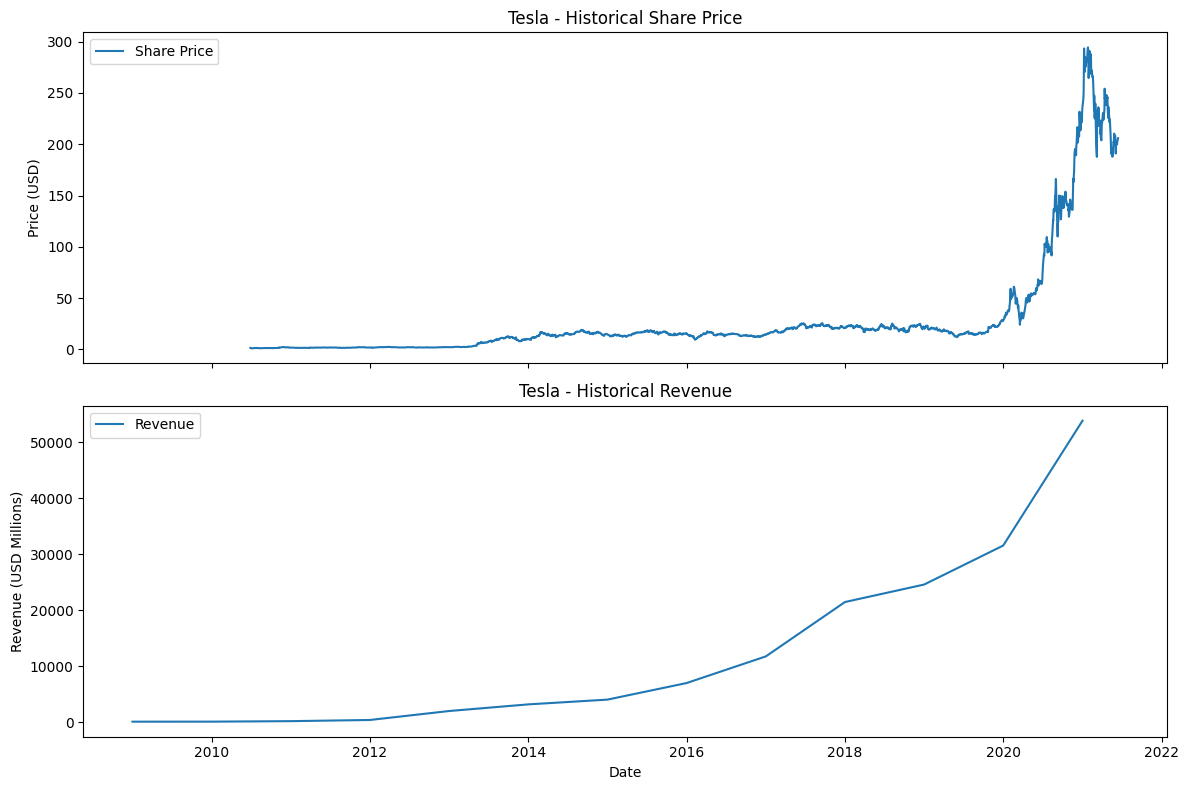

In [91]:
make_graph(tesla_data, tesla_revenue, "Tesla")


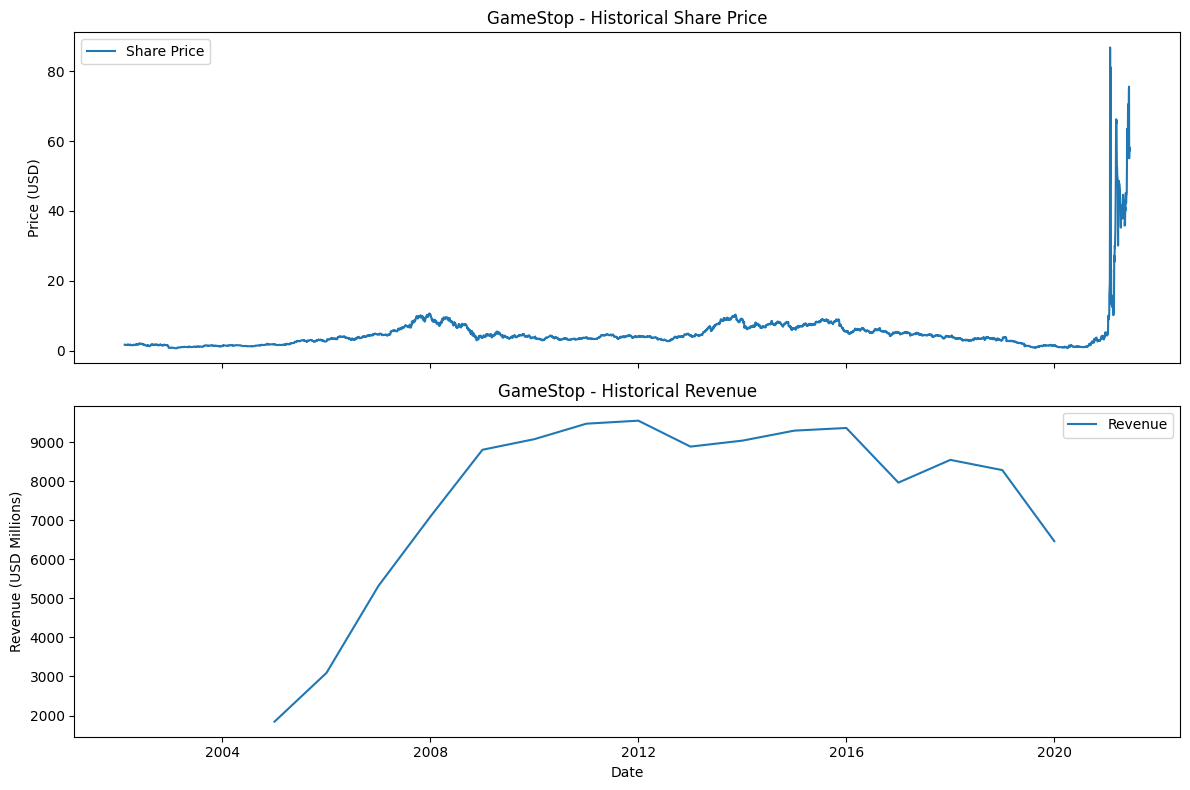

In [92]:
make_graph(gme_data, gme_revenue, "GameStop")
